In [3]:
import os
import cv2
import numpy as np
import pandas as pd

from insightface.app import FaceAnalysis

In [4]:
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='models',
                       providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

faceapp.prepare(ctx_id=0,
                det_size=(640,640),
                det_thresh=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_sc/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_sc/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_sc/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_sc/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: models/models/buffalo_sc/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


### Extract facial features and labels

In [5]:
import re

In [6]:
def clean_name(string):
    string = re.sub(r'[^A-Za-z]', ' ', string)
    # string = string.upper()
    return string

In [7]:
person_info = []
list_dir = os.listdir(path='images/')
for folder_name in list_dir:
    role, name = (folder_name.split('-'))
    name = clean_name(name)
    role = clean_name(role)

    # path of each image in respective folder
    img_files = os.listdir(path=f'images/{folder_name}')
    for file in img_files:
        path = f'./images/{folder_name}/{file}'
        # step-1: read the image
        img_arr = cv2.imread(path)

        # step-2: get the info
        result = faceapp.get(img_arr, max_num=1)

        if len(result) > 0:
            # step-3: get facial embeddings
            res = result[0]
            embedding = res['embedding']
            
            # step-4: save all info name, role, embedding in a list
            person_info.append([name, role, embedding])  

/home/glccampos/Downloads/pass/envs/face_reco/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [8]:
data_frame = pd.DataFrame(person_info, columns=['Name', 'Role', 'Facial_Features'])
data_frame

,Name,Role,Facial_Features
0,Chris Evans,student,"[0.10548751, -0.16437584, -0.23047763, 0.27103..."
1,Chris Evans,student,"[-0.072505, -0.5728063, 0.1987688, 0.47841218,..."
2,Chris Evans,student,"[0.175464, -0.48385876, 0.17103297, -0.7554828..."
3,Chris Evans,student,"[0.3651446, 0.4726662, 0.06029275, 0.67260396,..."
4,Chris Evans,student,"[0.33150026, -0.761284, 1.0437284, 0.41133076,..."
5,Chris Evans,student,"[0.538957, -0.40241736, 0.2683054, -1.2550075,..."
6,Chris Evans,student,"[0.36040106, -0.27098814, -0.88910955, -1.0246..."
7,Chris Evans,student,"[0.53513354, -0.30261618, -0.54563934, 0.20704..."
8,Chris Evans,student,"[0.5479652, -0.4853003, -0.03283581, -0.794613..."
9,Chris Evans,student,"[0.68155617, -1.1781247, 0.34811854, 0.2456622..."


#### Read test image

In [9]:
img_test = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test iamge', img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Extract embeddings

In [10]:
res_test = faceapp.get(img_test, max_num=0)
for i, rt in enumerate(res_test):
    print('curent loop =', i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']
    

curent loop = 0


/home/glccampos/Downloads/pass/envs/face_reco/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [11]:
data_frame.head(2)

,Name,Role,Facial_Features
0,Chris Evans,student,"[0.10548751, -0.16437584, -0.23047763, 0.27103..."
1,Chris Evans,student,"[-0.072505, -0.5728063, 0.1987688, 0.47841218,..."


In [12]:
X_list = data_frame['Facial_Features'].tolist()
X = np.asarray(X_list)

In [13]:
X.shape

(50, 512)

In [14]:
from sklearn.metrics import pairwise

In [15]:
y = embed_test.reshape(1,-1)

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [16]:
data_search = data_frame.copy()
data_search['equlidean_distance'] = equlidean_distance
data_search['manhattan_distance'] = manhattan_distance
data_search['cosine_similar'] = cosine_similar

In [17]:
data_search.head(2)

,Name,Role,Facial_Features,equlidean_distance,manhattan_distance,cosine_similar
0,Chris Evans,student,"[0.10548751, -0.16437584, -0.23047763, 0.27103...",18.511791,332.515792,0.571528
1,Chris Evans,student,"[-0.072505, -0.5728063, 0.1987688, 0.47841218,...",21.272852,391.027261,0.505378


In [18]:
import matplotlib.pyplot as plt

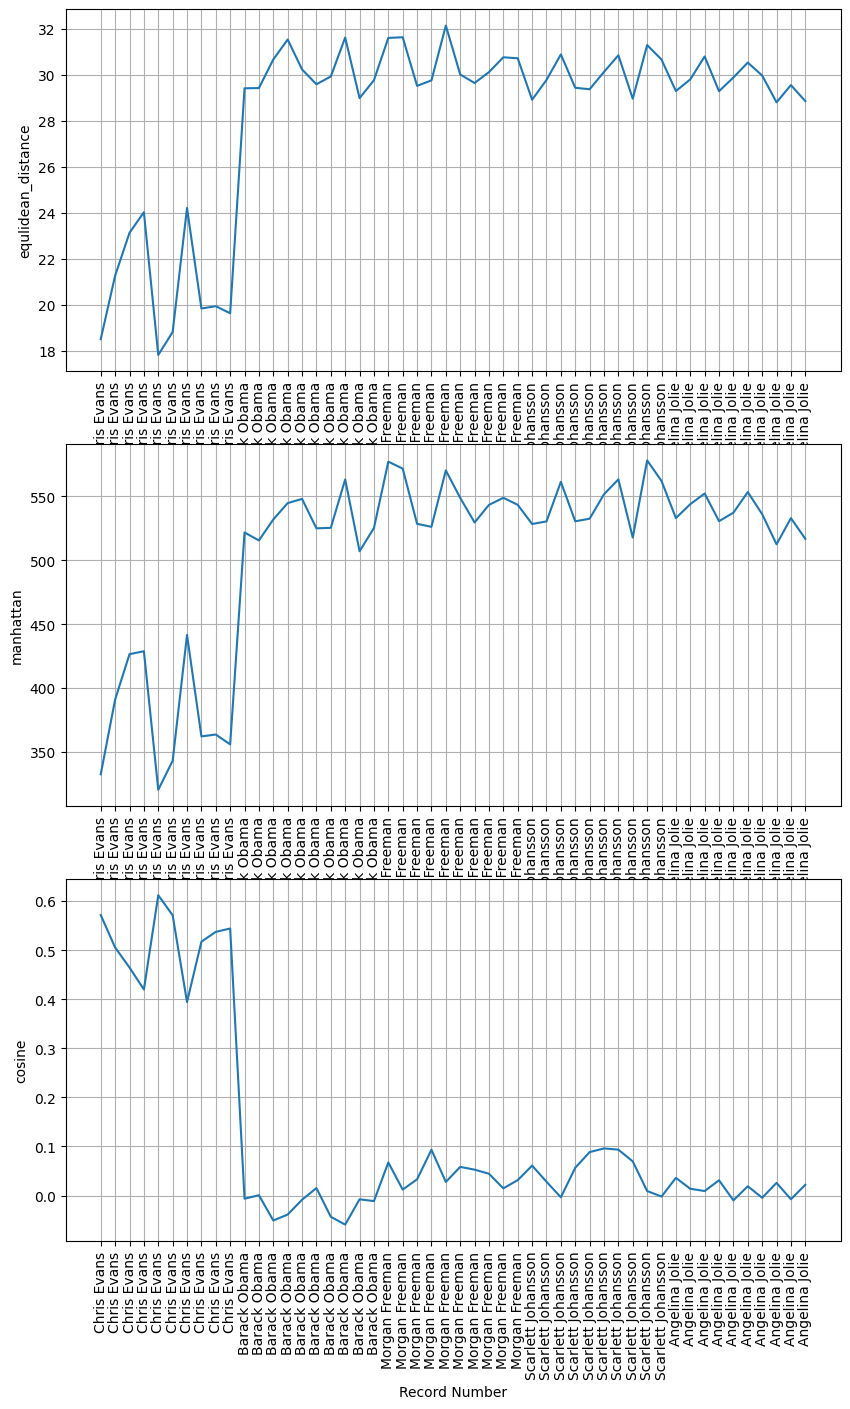

In [19]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean_distance'])
plt.xticks(ticks=list(range(len(data_search['equlidean_distance']))),
           labels=data_search['Name'],
           rotation=90)
plt.xlabel('Record Number')
plt.ylabel('equlidean_distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan_distance'])
plt.xticks(ticks=list(range(len(data_search['manhattan_distance']))),
           labels=data_search['Name'],
           rotation=90)
plt.xlabel('Record Number')
plt.ylabel('manhattan')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine_similar'])
plt.xticks(ticks=list(range(len(data_search['cosine_similar']))),
           labels=data_search['Name'],
           rotation=90)
plt.xlabel('Record Number')
plt.ylabel('cosine')
plt.grid()


plt.show()

### Identify person with cosine similarity

In [20]:
s_opt = 0.4

In [21]:
data_filter = data_search.query(f'cosine_similar > {s_opt}')
data_filter.reset_index(drop=True, inplace=True)

if len(data_filter) > 0:
    argmax = data_filter['cosine_similar'].argmax()
    name_sin, role_sin = data_filter.loc[argmax][['Name', 'Role']]

else:
    name_sin = 'Unknown'
    role_sin = 'Unknown'

In [22]:
print(name_sin, role_sin)

Chris Evans student


### Identify multiple people in an image

In [23]:
def ml_search_algorithm(df,
                        feature_column,
                        test_vector,
                        name_role=['Name', 'Role'],
                        thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    # step-1: take the df (data collection)
    dataframe = df.copy()
    # step-2: index face embedding from df and covert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    # step3: calculate cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]
    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role
        

In [24]:
test_image = cv2.imread('test_images/test_2.jpeg')
cv2.imshow('test image', test_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()

# step-2: use for loop to extract each embedding to feed ml_search_algorithm
for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(data_filter,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name', 'Role'],
                                                   thresh=0.4)
    if person_name == 'Unknown':
        color = (0,0,255)
    else:
        color = (0,255,0)
    cv2.rectangle(test_copy, (x1,y1), (x2,y2), color)
    text_gen = person_name
    cv2.putText(test_copy, text_gen, (x1,y1), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 1)

cv2.imshow('test image', test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

/home/glccampos/Downloads/pass/envs/face_reco/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


### Compress Dataset

In [26]:
dataframe_compressed = data_frame.groupby(by=['Name', 'Role']).mean()
dataframe_compressed.reset_index(inplace=True)
dataframe_compressed

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[0.19881934, 1.4748836, -0.0979588, -0.8805054..."
1,Barack Obama,teacher,"[-0.22177827, 1.5762169, -0.50307816, 0.136012..."
2,Chris Evans,student,"[0.35691044, -0.41491055, 0.03921845, -0.15436..."
3,Morgan Freeman,teacher,"[0.7627893, 0.89061487, 0.46873555, 0.25898102..."
4,Scarlett Johansson,student,"[-0.13535985, -0.2821385, -0.4270084, -0.28251..."


### convert df into array and save in npzip format

In [27]:
xvalues = dataframe_compressed.values
xvalues

array([['Angelina Jolie', 'student',
        array([ 1.98819339e-01,  1.47488356e+00, -9.79588032e-02, -8.80505383e-01,
               -4.95910585e-01,  6.36726499e-01,  7.20376015e-01,  4.32282597e-01,
               -1.01364553e+00, -2.19139904e-01, -1.25164151e+00,  6.03814144e-03,
               -1.09009707e+00, -9.10603166e-01,  9.80033696e-01, -8.09054494e-01,
               -3.22003990e-01, -3.24544460e-01, -1.63141221e-01, -2.94832826e-01,
                6.83660626e-01,  3.98858368e-01, -3.36507887e-01, -3.36677283e-01,
               -1.28404528e-01,  1.73691958e-01,  5.91800511e-01, -6.08569384e-01,
                1.05134308e+00,  7.50759006e-01,  5.74572310e-02, -4.44745600e-01,
                7.34935105e-01, -1.39604640e+00,  5.44290066e-01,  1.25654340e+00,
                1.07477307e-01, -3.43763322e-01, -1.06024288e-01,  1.95718420e+00,
                6.32469296e-01,  5.08051276e-01,  5.25605261e-01, -2.16748472e-02,
               -8.33836257e-01, -5.27095906e-02, -

In [28]:
col_name = np.array(dataframe_compressed.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [29]:
np.savez('dataframe_students_teachers.npz', xvalues, col_name)

### load npzip

In [30]:
file_np = np.load('dataframe_students_teachers.npz', allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [31]:
pd.DataFrame(file_np['arr_0'], columns=file_np['arr_1'])

,Name,Role,Facial_Features
0,Angelina Jolie,student,"[0.19881934, 1.4748836, -0.0979588, -0.8805054..."
1,Barack Obama,teacher,"[-0.22177827, 1.5762169, -0.50307816, 0.136012..."
2,Chris Evans,student,"[0.35691044, -0.41491055, 0.03921845, -0.15436..."
3,Morgan Freeman,teacher,"[0.7627893, 0.89061487, 0.46873555, 0.25898102..."
4,Scarlett Johansson,student,"[-0.13535985, -0.2821385, -0.4270084, -0.28251..."
